Extracted Text (Sample): Cram Cræk
Diny Well
Us&s Loo
Minger Minger Peel
Lbwn Had
Thunder
Blowholes
Fabe Bitrance
Blowholes
Saag
Punch well
Willy Tank
•Sinking
Butte
S•ag
Chun#kx) Group
Ccek*belily Pml
•Minge


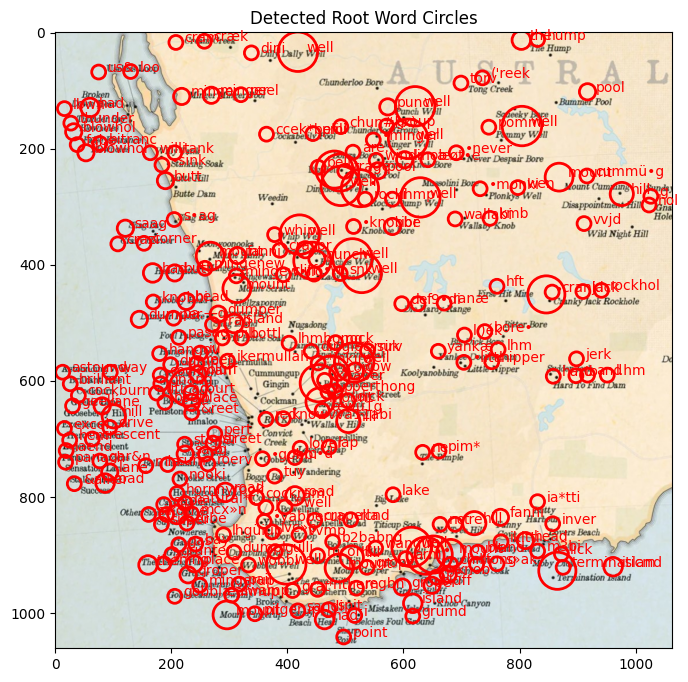

In [6]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import spacy
from collections import defaultdict
from nltk.stem import SnowballStemmer

# Load the SpaCy NER model
nlp = spacy.load("en_core_web_sm")

# API configuration
API_KEY = 'XXXXXXXXXXXXXXX' ## repalce with your own
OCR_ENDPOINT = "https://api.ocr.space/parse/image"

# Define image path
image_path = "./YOUR_MAP_NAME.jpg"

# Initialize SnowballStemmer for English
stemmer = SnowballStemmer('english')

# Function to call the OCR.space API with increased timeout
def call_ocr_api(filename, api_key=API_KEY, timeout=180):
    payload = {
        'apikey': api_key,
        'language': 'eng',
        'isOverlayRequired': True,  # Needed to get word coordinates
    }
    with open(filename, 'rb') as f:
        response = requests.post(OCR_ENDPOINT, files={filename: f}, data=payload, timeout=timeout)
    return response.json()

# Function to process OCR results and generate stemmed word counts with positions
def process_ocr_results(result):
    word_counts = defaultdict(int)
    word_positions = defaultdict(list)  # Store word positions for drawing circles
    
    if result['IsErroredOnProcessing']:
        print("Error:", result['ErrorMessage'])
    else:
        extracted_text = result['ParsedResults'][0]['ParsedText'] if result['ParsedResults'] else "No text found."
        print("Extracted Text (Sample):", extracted_text[:200])  # Display first 200 characters of text
        
        # Parse word positions and apply SpaCy NLP processing
        text_overlay = result['ParsedResults'][0]['TextOverlay'] if 'TextOverlay' in result['ParsedResults'][0] else None
        if text_overlay:
            for line in text_overlay['Lines']:
                for word_info in line['Words']:
                    word_text = word_info['WordText']
                    x, y = word_info['Left'], word_info['Top']
                    word_stem = stemmer.stem(word_text.lower())
                    word_counts[word_stem] += 1
                    word_positions[word_stem].append((x, y))
        
    return word_counts, word_positions

# Function to display circles around recognized root words
def display_circles_overlay(image_path, word_counts, word_positions):
    # Load the original image
    image = Image.open(image_path)
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(image)
    
    # Add circles based on word positions and frequencies
    for word_stem, positions in word_positions.items():
        frequency = word_counts[word_stem]
        for x, y in positions:
            # Draw circle with radius proportional to word frequency
            circle = Circle((x, y), radius=10 + frequency * 2, color='red', fill=False, linewidth=2)
            ax.add_patch(circle)
            # Annotate the word next to the circle
            ax.text(x + 15, y, word_stem, color='red', fontsize=10)
    
    plt.title('Detected Root Word Circles')
    plt.show()

# Main processing steps
ocr_result = call_ocr_api(image_path, api_key=API_KEY)
word_counts, word_positions = process_ocr_results(ocr_result)

if word_counts:
    # Display circles around the words based on root word frequency
    display_circles_overlay(image_path, word_counts, word_positions)
else:
    print("No text found in the OCR result.")
